In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/FundamentosCienciaDatos/books_clean_for_eda.csv')
df.head()

,title,description,availability,rating,description_length,price,sentiment_label,categoria_agrupada
0,its only the himalayas,wherever you go whatever you do just dont d...,19,2,224.0,45.17,positive,Lifestyle & Personal Development
1,full moon over noahs ark an odyssey to mount a...,acclaimed travel writer rick antonson sets his...,15,4,284.0,49.43,positive,Lifestyle & Personal Development
2,see america a celebration of our national park...,to coincide with the 2016 centennial anniversa...,14,3,145.0,48.87,positive,Lifestyle & Personal Development
3,vagabonding an uncommon guide to the art of lo...,with a new foreword by tim ferriss theres noth...,8,2,316.0,36.94,positive,Lifestyle & Personal Development
4,under the tuscan sun,a classic from the bestselling author of under...,7,3,166.0,37.33,positive,Lifestyle & Personal Development


<Axes: xlabel='categoria_agrupada', ylabel='count'>

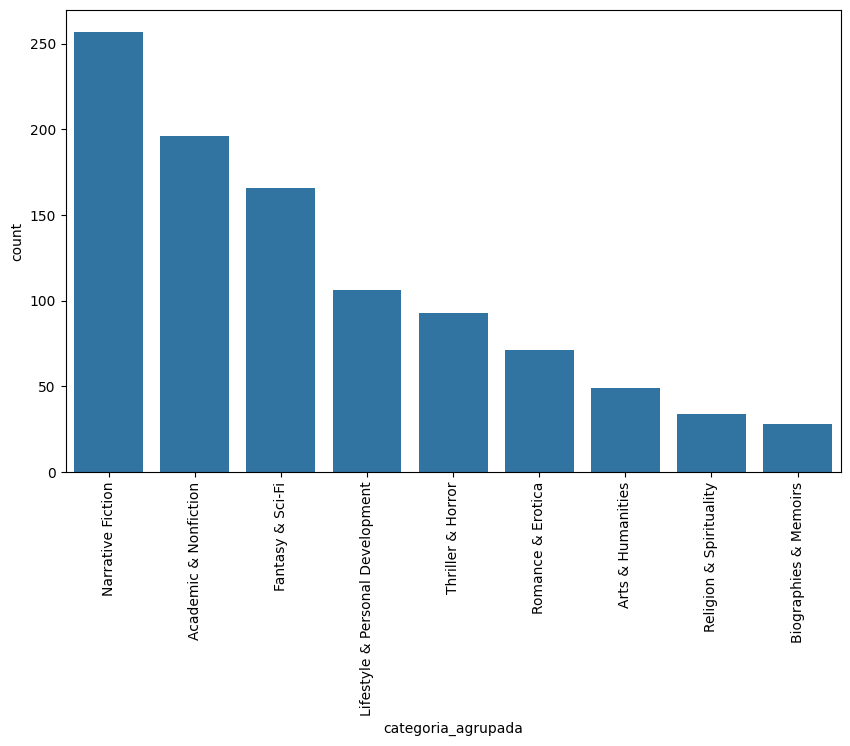

In [ ]:
df_category_counts = pd.DataFrame(df["categoria_agrupada"].value_counts())
df_category_counts.sort_values(by = "count")
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.barplot(df_category_counts,x=df_category_counts.index,y="count")

<Axes: xlabel='rating', ylabel='count'>

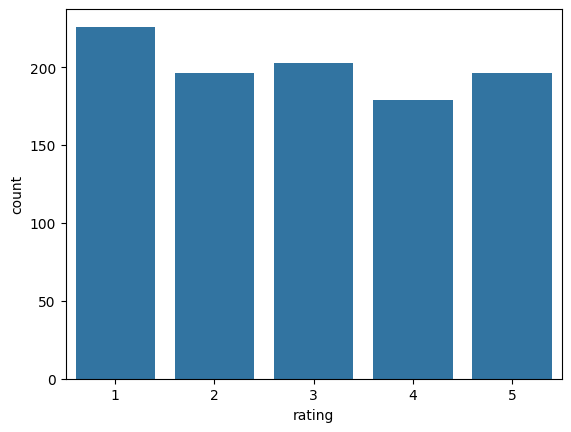

In [ ]:
sns.countplot(df,x="rating")

No hay una diferencia en frecuencias que parezca significativa a simple vista.

In [ ]:
libros_malos_o_neutros = len(df[df["rating"] <= 3])
libros_buenos = len(df[df["rating"] > 3])
print(f"EL {libros_malos_o_neutros * 100 / len(df)}% de los libros son calificados como malos o neutros")
print(f"El {libros_buenos * 100/ len(df)}% de los libros son calificados como buenos")

EL 62.5% de los libros son calificados como malos o neutros
El 37.5% de los libros son calificados como buenos


<Axes: xlabel='availability', ylabel='count'>

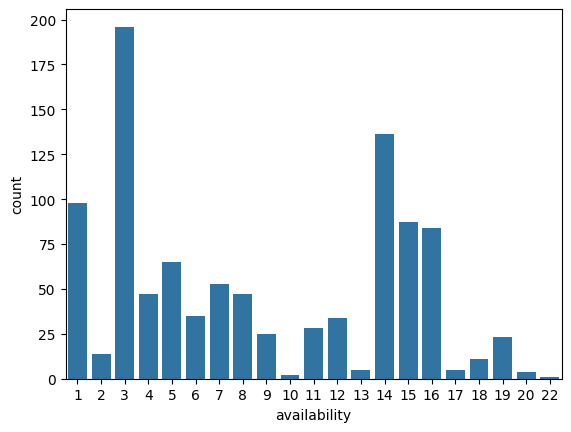

In [ ]:
sns.countplot(df,x="availability")

<Axes: xlabel='sentiment_label', ylabel='count'>

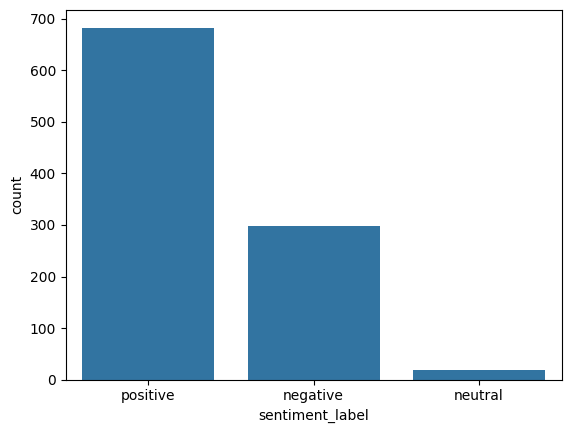

In [ ]:
sns.countplot(df,x="sentiment_label")

La mayoría de la descripción de los libros tiene un sentimiento positivo.

In [ ]:
df[["availability","rating"]]

,availability,rating
0,19,2
1,15,4
2,14,3
3,8,2
4,7,3
...,...,...
995,5,5
996,3,2
997,3,1
998,3,3


<Axes: xlabel='rating', ylabel='availability'>

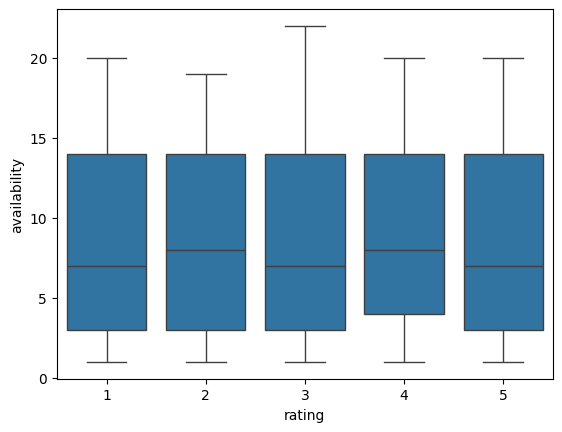

In [ ]:
sns.boxplot(df,x="rating",y="availability")

<Axes: xlabel='price', ylabel='categoria_agrupada'>

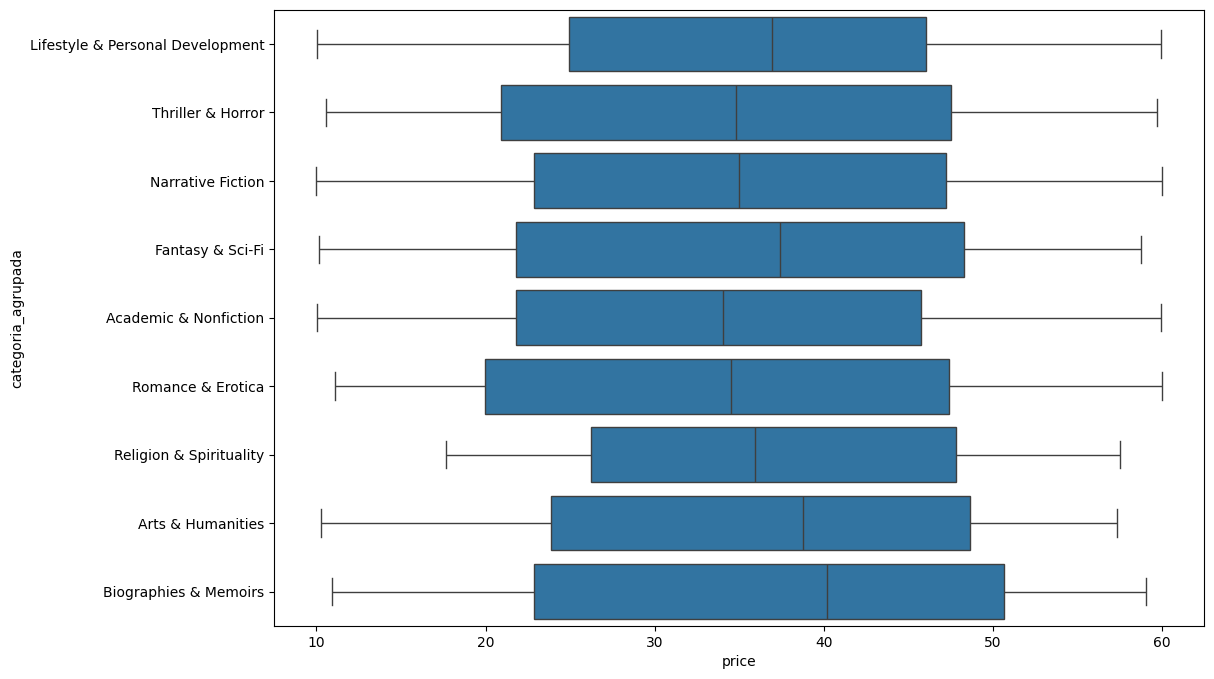

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(df,y="categoria_agrupada",x="price")

La categoría de libros sí parece tener algo de influencia en el precio de los libros.

<Axes: xlabel='rating', ylabel='price'>

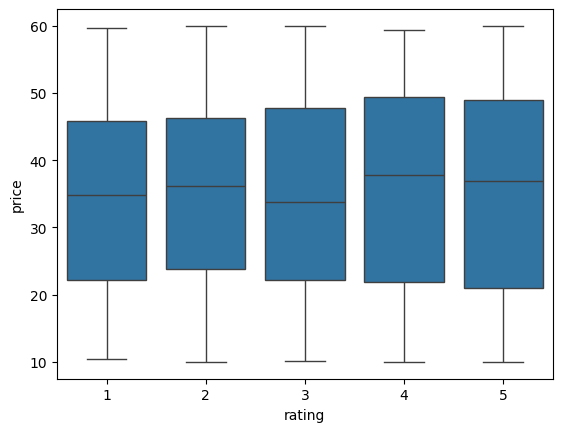

In [ ]:
sns.boxplot(df,x="rating",y="price")

El rating no parece influir en el precio de los libros.

<Axes: xlabel='availability', ylabel='price'>

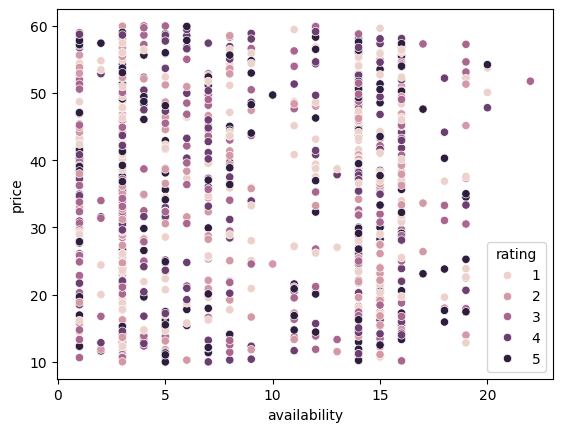

In [ ]:
sns.scatterplot(df,x="availability",y="price",hue="rating")

No hay evidencia de que los libros con menor disponibilidad tienen mejor calificación y sean más costosos.
Tampoco se muestra que los libros con mayor calificación sean los más caros.

<Axes: xlabel='description_length', ylabel='price'>

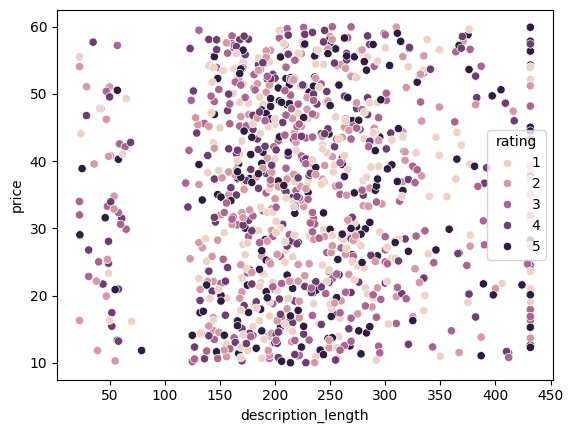

In [ ]:
sns.scatterplot(df,x="description_length",y="price", hue="rating")

<Axes: xlabel='categoria_agrupada', ylabel='description_length'>

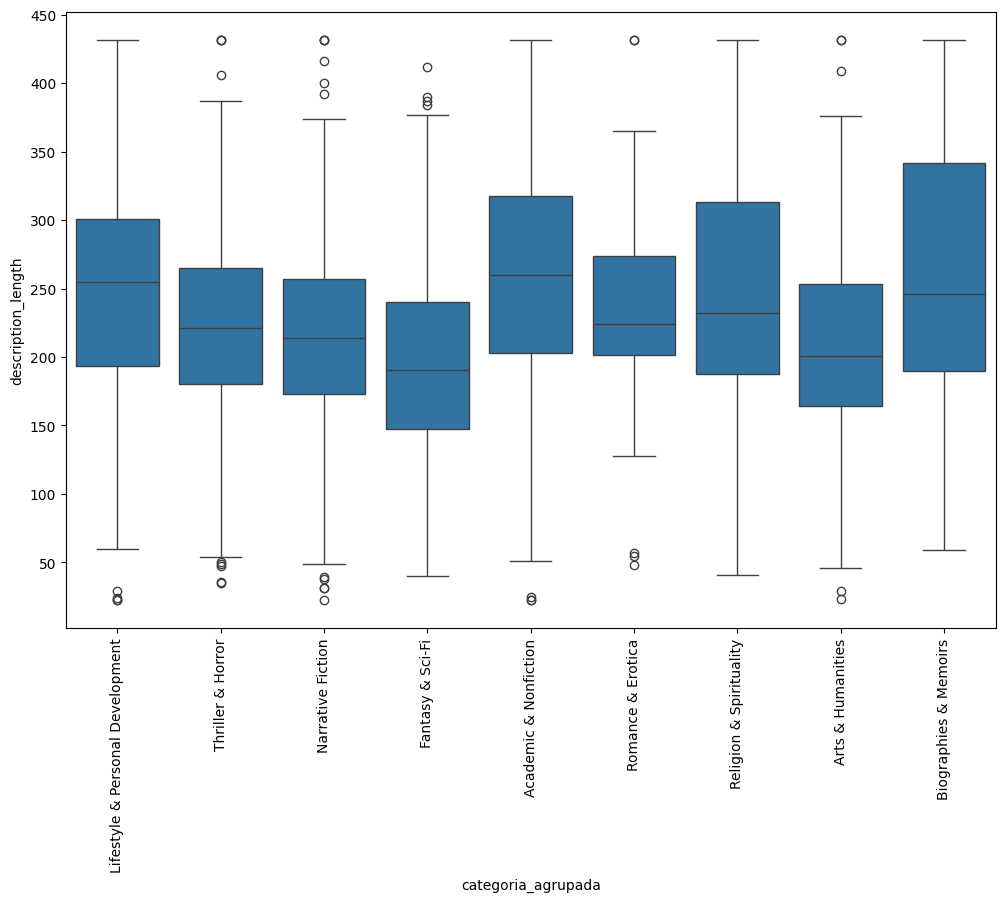

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.boxplot(df,x="categoria_agrupada",y="description_length")

<Axes: xlabel='sentiment_label', ylabel='rating'>

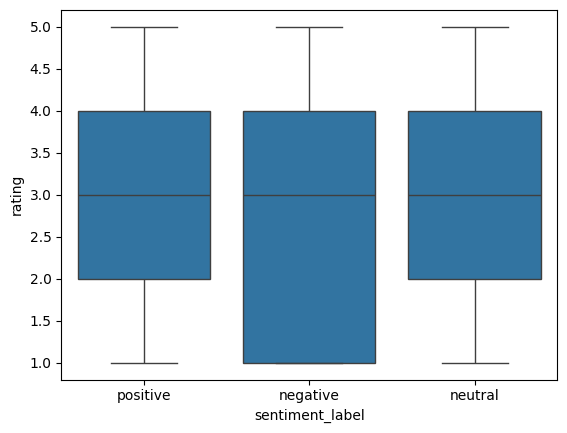

In [ ]:
sns.boxplot(df,x="sentiment_label", y="rating")

Se puede obeservar que los libros con sentimiento negativo tienen menor rating.

<Axes: xlabel='rating', ylabel='Count'>

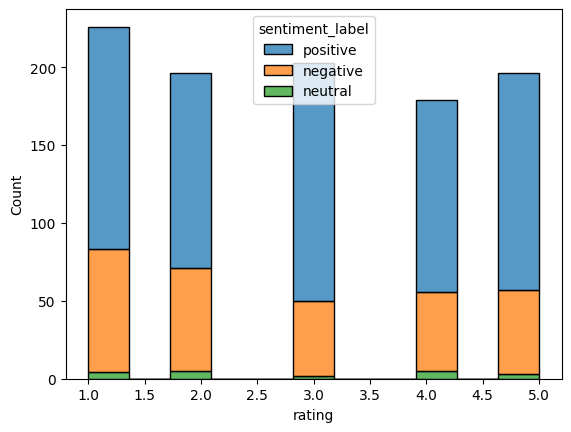

In [ ]:
sns.histplot(df,x="rating",hue="sentiment_label",multiple="stack")

Los libros con negativos tienen menor rating comparando su proporción con los positivos.

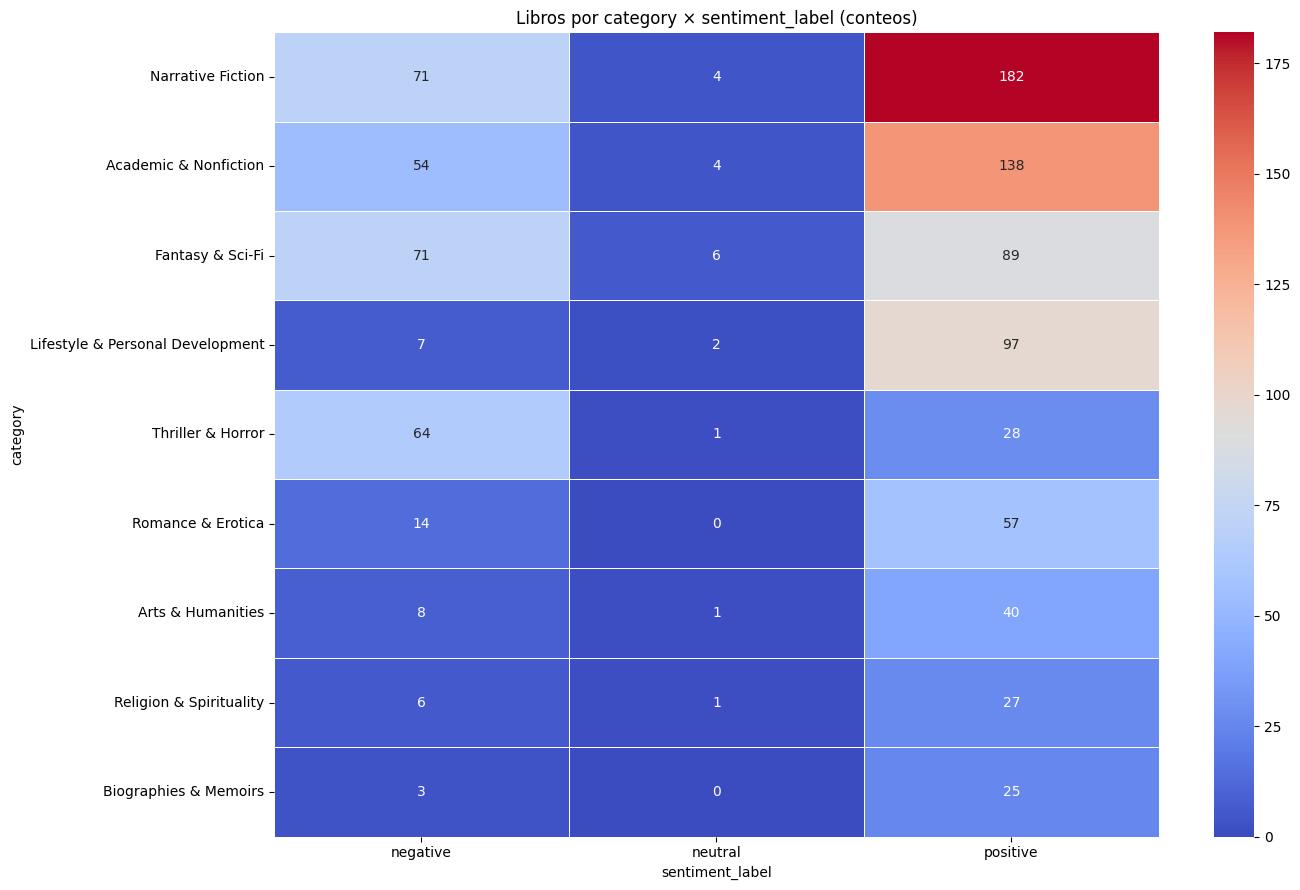

In [ ]:
tabla = pd.crosstab(df["categoria_agrupada"], df["sentiment_label"])

tabla = tabla.loc[tabla.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(14, 9))
sns.heatmap(tabla, annot=True, fmt="d", cmap="coolwarm", linewidths=.5, linecolor="white")
plt.xlabel("sentiment_label")
plt.ylabel("category")
plt.title("Libros por category × sentiment_label (conteos)")
plt.tight_layout()
plt.show()

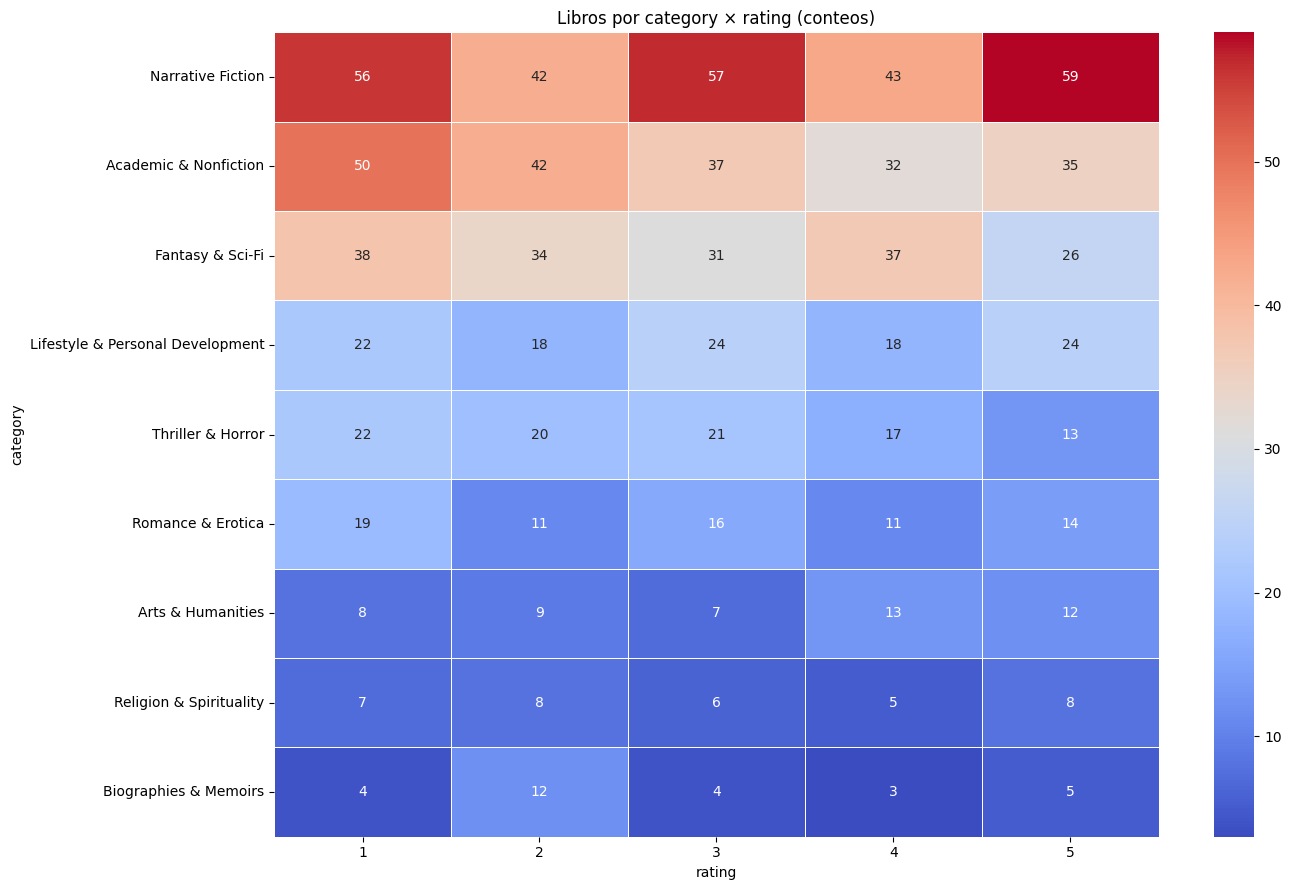

In [ ]:
tabla = pd.crosstab(df["categoria_agrupada"], df["rating"])

tabla = tabla.loc[tabla.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(14, 9))
sns.heatmap(tabla, annot=True, fmt="d", cmap="coolwarm", linewidths=.5, linecolor="white")
plt.xlabel("rating")
plt.ylabel("category")
plt.title("Libros por category × rating (conteos)")
plt.tight_layout()
plt.show()

In [ ]:
df_numeric = df.select_dtypes(include=["int64","float64"])
summary = pd.DataFrame({
    "mean": df_numeric.mean(),
    "std": df_numeric.std(),
    "median": df_numeric.median(),
    "min": df_numeric.min(),
    "Q1": df_numeric.quantile(0.25),
    "Q3": df_numeric.quantile(0.75),
    "max": df_numeric.max()
})

<Axes: ylabel='price'>

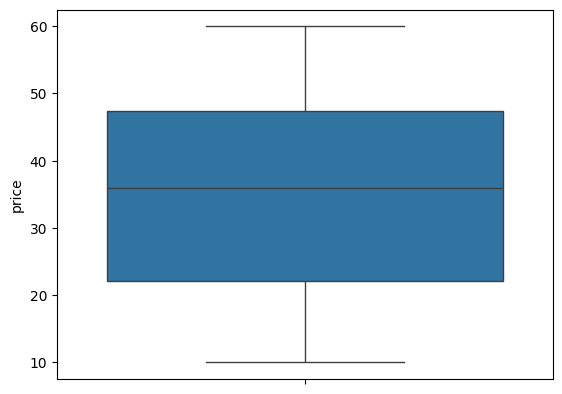

In [ ]:
sns.boxplot(df,y="price")

<Axes: title={'center': 'Distribución de precios'}, xlabel='price', ylabel='Density'>

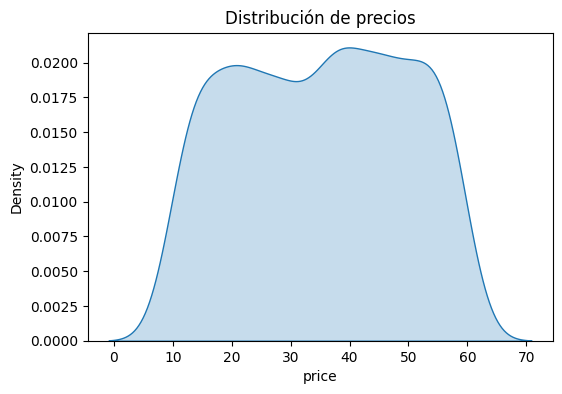

In [ ]:
plt.figure(figsize=(6,4))
plt.title("Distribución de precios")
sns.kdeplot(df,x="price", fill = True)

## Estadística descriptiva

In [ ]:
summary

,mean,std,median,min,Q1,Q3,max
availability,8.585000,5.654622,7.00,1.000,3.0000,14.0000,22.000
rating,2.923000,1.434967,3.00,1.000,2.0000,4.0000,5.000
description_length,230.490125,86.167001,221.00,22.625,176.0000,278.2500,431.625
price,35.070350,14.446690,35.98,10.000,22.1075,47.4575,59.990


## Correlación

<Axes: >

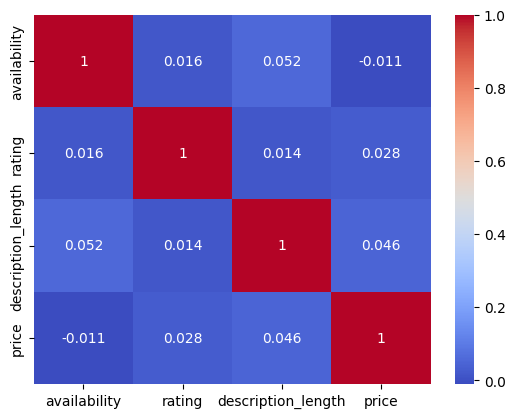

In [ ]:
sns.heatmap(df_numeric.corr(),annot=True,cmap="coolwarm")

No hay correlación lineal entre las variables.

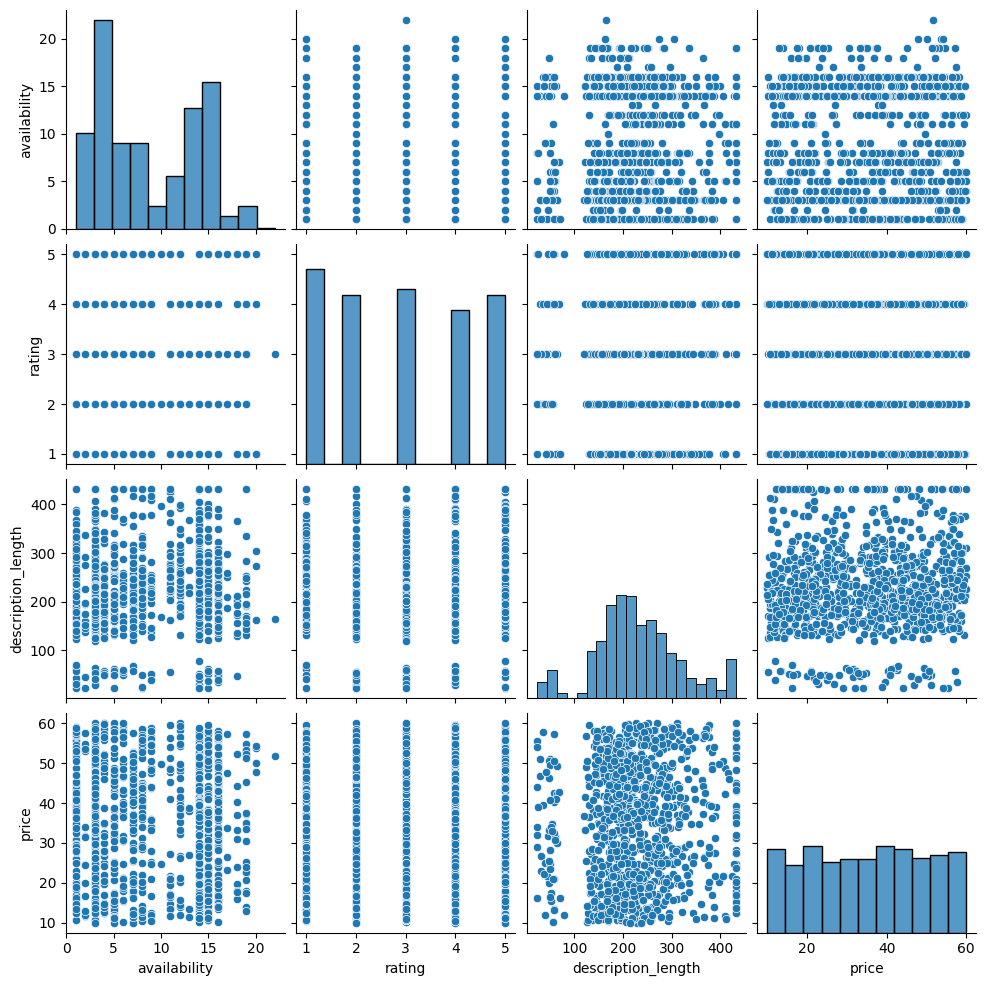

In [ ]:
numerical_columns = df.select_dtypes(include=["int64","float64"]).columns
sns.pairplot(df[numerical_columns])

No se muestra ninguna relación lineal

## Conclusiones

- No hay relación lineal entre las variables numéricas.
- Hay una diferencia en la cantidad de titulos entre las categorías.
- Si se tuvieran más títulos por categorias podría analizarse mejor el rating que reciben. Por ejemplo, las biografías no reciben buenas calificaciones, se concentra en 2 estrellas; thriller y horror podría costarle tener libros de 5 estrellas. No obstante, en general parece haber una cantidad relativamente similar en rating, es decir, que no hay una categoría que digas que califican totalmente bien o totalmente mal.
- La mayoría de los libros cuentan con un sentimiento positivo. Es muy raro que haya libros con sentimientos neutros.
- La disponibilidad no influye en el precio de los libros.
- Los libros con poca disponibilidad no significa que sean los que tengan mejor rating.
- La descripción de los libros no influye en los libros. La longitud de descripción de los libros se concentra en el rango de 140 a 330 palabras.
- La cantidad de palabras de la descripción para la categorías tienen un rango similar, aunque su distribución es diferente. La categoría con menor rango, que tiende a ser más consistente en su cantidad de palabras es Romance y Erótica.